# The quark-gluon plasma fireball in ultrarelativistic heavy-ion collisions

Relativistic hydrodynamic simulations of heavy-ion collisions contain a wide variety of **model parameters** for the initial conditions and hydrodynamic evolution of the **quark-gluon plasma**. These model parameters, along with the **impact parameter**, influence the size of the expanding **fireball**.

The goal is to build a **multivariate-regression model** that predicts the **mean and std of the fireball radius distribution** (see example below) for a given set of model parameters + impact parameter (for now we keep them fixed).

A practical application of this regression model is minimizing the **grid size** for hydrodynamic simulations. By automatically configuring the grid to be just large enough to fit the fireball **(instead of using the same grid for all parameter combinations)**, we can significantly reduce the computational time required to run millions of simulation events for a transport property extraction of QCD matter via Bayesian analysis. 

This example data set illustrates how large the quark-gluon plasma's **fireball radius** can get in viscous hydrodynamic simulations of Pb+Pb collisions at LHC energies. Here we look at central collisions with zero impact parameter **b = 0 fm** (i.e. they completely overlap each other in the collision zone) with fluctuating initial conditions for the temperature profile.


In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load example data


This dataset contains the **max fireball radius** computed for the **500 fluctuating hydrodynamic events** described above. It also contains the spacetime coordinates **(tau, x, y)** when/where the max radius occurred (the longitudinal proper time **tau** can be thought of as the usual time **t**).

These hydro events assume longitudinal boost-invariance, meaning that the fireball along the longitudinal direction **eta** (spacetime rapidity) looks the same.

Although the longitudinal expansion rate is nonzero (Milne coordinates are curvilinear), we can visualize the fireball to be evolving in the transverse plane only.

For this data set and future training sets, we fix the spatial grid to **30 fm x 30 fm**, with a lattice spacing of **dx = dy = 0.2 fm**. Typically, a spatial resolution of **0.1 fm** is needed to resolve initial state fluctuations in the transverse plane, but hydrodynamic codes can run about **8 times faster** on the coarser grid (allowing for larger data sets)

samples = 500
range   = [11.41 fm, 14.36 fm]
mean    = 12.18 fm
std     = 0.40 fm
skew    = 1.19


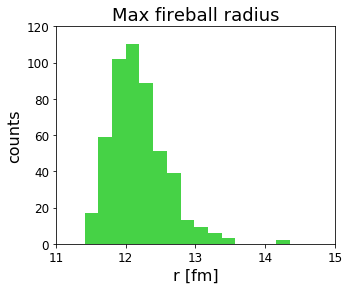

In [2]:
X = np.loadtxt("fireball_radius_example.dat", dtype = float)

tau    = X[:,0]     # spacetime coordinates of max fireball radius 
x      = X[:,1]
y      = X[:,2]
radius = X[:,4]     # max fireball radius

print("samples = %d" % X.shape[0])
print("range   = [%.2f fm, %.2f fm]" % (radius.min(), radius.max()))
print("mean    = %.2f fm" % radius.mean())
print("std     = %.2f fm" % radius.std())
print("skew    = %.2f" % stats.skew(radius))

bin_width = 0.2
bins = math.ceil((radius.max() - radius.min()) / bin_width)

plt.figure(figsize = (5,4))
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.hist(radius, bins = bins,  alpha=0.9, color='limegreen')
plt.title("Max fireball radius")
plt.xlabel("r [fm]")
plt.ylabel("counts")
plt.xlim(11,15)
plt.ylim(0,120)
plt.show()

We see that this distribution has a **positive skewness**. This can be attributed to the participant nucleons, whose energy deposition is modeled as a Gaussian distribution (here the **nucleon width** is set to **w = 1.1 fm**). 

These Gaussian bumps tend to push the fireball further outward in fluctuating hydrodynamic events.

# Max fireball radius spacetime distributions

For zero impact parameter **b = 0 fm**, we expect the radius samples to fall along
a circle in the transverse plane (on average) due to azimuthal symmetry.

Most samples occur right after initialization **tau = 0.05 fm/c**, making them susceptible to initial state fluctuations.

However, one can see that there is another cluster caused by the buildup of transverse expansion at later times **tau = 7.5 - 10 fm/c**.

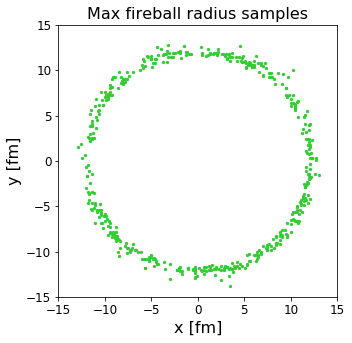

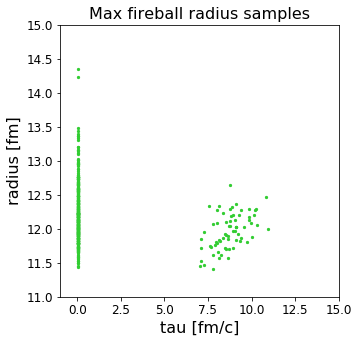

In [3]:
plt.figure(figsize = (5,5))
plt.scatter(x, y, color = 'limegreen', s = 5)
plt.title("Max fireball radius samples", fontsize = 16)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel("x [fm]", fontsize = 16)
plt.ylabel("y [fm]", fontsize = 16)
plt.show()

plt.figure(figsize = (5,5))
plt.scatter(tau, radius, color = 'limegreen', s = 5)
plt.title("Max fireball radius samples", fontsize = 16)
plt.ylim(11,15)
plt.xlim(-1,15)
plt.xlabel("tau [fm/c]", fontsize = 16)
plt.ylabel("radius [fm]", fontsize = 16)
plt.show()

# Separating the initial and hydro clusters

A very early initialization of the hydrodynamic simulation may have caused the fireball radius distribution to be overly sensitive to initial state fluctuations.

Training a single regression model on the total radius distribution might cloud the effects of the hydrodynamic evolution on the fireball radius.

Therefore, it makes sense to **isolate these two clusters** (which can be done by hand).

Initial max radius:
samples = 431
range   = [11.44 fm, 14.36 fm]
mean    = 12.22 fm
std     = 0.41 fm
skew    = 1.17

Hydro max radius:
samples = 69
range   = [11.41 fm, 12.65 fm]
mean    = 11.97 fm
std     = 0.26 fm
skew    = 0.04


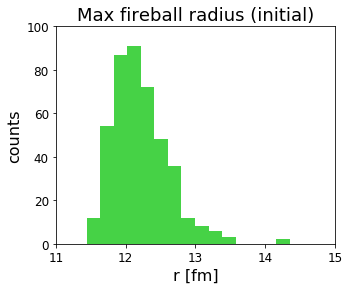

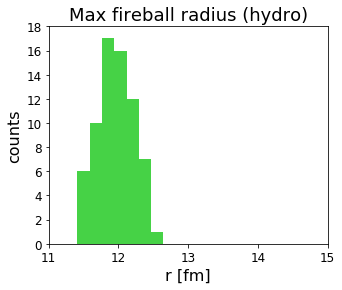

In [4]:
radius_initial = radius[tau <= 0.2]
radius_hydro = radius[tau > 0.2]

print("Initial max radius:")
print("samples = %d" % radius_initial.shape[0])
print("range   = [%.2f fm, %.2f fm]" % (radius_initial.min(), radius_initial.max()))
print("mean    = %.2f fm" % radius_initial.mean())
print("std     = %.2f fm" % radius_initial.std())
print("skew    = %.2f" % stats.skew(radius_initial))
print()
print("Hydro max radius:")
print("samples = %d" % radius_hydro.shape[0])
print("range   = [%.2f fm, %.2f fm]" % (radius_hydro.min(), radius_hydro.max()))
print("mean    = %.2f fm" % radius_hydro.mean())
print("std     = %.2f fm" % radius_hydro.std())
print("skew    = %.2f" % stats.skew(radius_hydro))

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels

bin_width = 0.2
bins = math.ceil((radius_initial.max() - radius_initial.min()) / bin_width)

plt.figure(figsize = (5,4))
plt.hist(radius_initial, bins = bins, alpha=0.9, color='limegreen')
plt.xlim(11,15)
plt.ylim(0,100)
plt.title("Max fireball radius (initial)")
plt.xlabel("r [fm]")
plt.ylabel("counts")
plt.show()

width = 0.2
bins = math.ceil((radius_hydro.max() - radius_hydro.min()) / width)

plt.figure(figsize = (5,4))
plt.hist(radius_hydro, bins = bins, alpha=0.9, color='limegreen')
plt.xlim(11,15)
plt.ylim(0,18)
plt.title("Max fireball radius (hydro)")
plt.xlabel("r [fm]")
plt.ylabel("counts")
plt.show()

It appears that **radius_hydro** is narrower and more symmetric compared to **radius_initial**, indicating that it is less dependent on model parameters associated with the initial state. 

Likewise, we would expect **radius_initial** to be independent of the model parameters that affect the hydrodynamic evolution.

Separating the initial state and hydrodynamic model parameters will probably make it easier to train a regression model for each of them. 
